# Getting data form Citrination demo

In [22]:
from citrination_client import CitrinationClient
client = CitrinationClient(site='our_site',api_key= "MY_KEY" ) 

In [23]:
from citrination_client import PifQuery
dataset_id = 1
query_dataset = PifQuery(include_datasets=[dataset_id])
query_result = client.search(query_dataset)
print("Found {} PIFs in dataset {}".format(query_result.total_num_hits, dataset_id))

Found 1064 PIFs in dataset 1


In [6]:
len(query_result.hits) # we have 1064 samples

1064

In [8]:
from pypif.pif import dumps
pifs = [x.system for x in query_result.hits]
print(dumps(pifs[0], indent=2)[:300])

{
  "tags": [
    "reaction id: R1",
    "date: Sat Nov 19 11:10:58 2016",
    "utc: 1479582658",
    "unidentified scattering"
  ],
  "category": "system.chemical",
  "uid": "R1_1479582658",
  "properties": [
    {
      "name": "temperature",
      "scalars": [
        {
          "value": "74.4"



In [10]:
import json 

# We will use only the samples that have 560 values for I and q
data = []
for line in pifs:
    my_str = dumps(line)
    obj = json.loads(my_str) # to transform the string to dictionary
    q_list_of_dic = obj['properties'][1]['conditions'][0]['scalars']
    q_list = []
    for i in q_list_of_dic:
        for k, v in i.items():
            q_list.append(v)
    I_list_of_dic = obj['properties'][1]['scalars']
    I_list = []
    for i in I_list_of_dic:
        for k, v in i.items():
            I_list.append(v)
    if (len(q_list) != 560 or len(I_list) != 560):
        continue
    sample_id = obj['uid']
    data.append([sample_id, q_list, I_list])
len(data)

1064

In [12]:
data[0] # sample id, q as a list, I as a list


['R1_1479582658',
 ['0.04000000476609963',
  '0.04100000488524913',
  '0.04200000500439864',
  '0.043000005123548145',
  '0.04400000524269765',
  '0.04500000536184716',
  '0.04600000548099666',
  '0.047000005600146166',
  '0.04800000571929567',
  '0.04900000583844518',
  '0.050000005957594684',
  '0.0510000060767442',
  '0.05200000619589369',
  '0.0530000063150432',
  '0.05400000643419272',
  '0.05500000655334221',
  '0.05600000667249172',
  '0.05700000679164124',
  '0.05800000691079073',
  '0.05900000702994024',
  '0.060000007149089735',
  '0.061000007268239245',
  '0.062000007387388756',
  '0.06300000750653825',
  '0.06400000762568776',
  '0.06500000774483727',
  '0.06600000786398677',
  '0.06700000798313628',
  '0.06800000810228579',
  '0.06900000822143529',
  '0.0700000083405848',
  '0.07100000845973431',
  '0.0720000085788838',
  '0.07300000869803332',
  '0.07400000881718283',
  '0.07500000893633232',
  '0.07600000905548183',
  '0.07700000917463135',
  '0.07800000929378084',
  '0.

### Now we can use data list as usial, for example, we can plot a random sample:



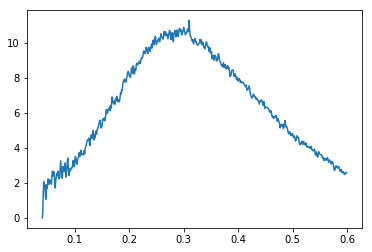

In [24]:
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

r_n = random.randint(0,1063)
plt.plot(data[r_n][1], data[r_n][2])